In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')


In [2]:
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon


In [4]:
df=pd.read_csv('sample_df_for model.csv',nrows=100000)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,...,pickup_position_qcut,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error
0,5863235,6032404,2014-12-18 12:18:00.00000072,8.00,2014-12-18 12:18:00 UTC,-73.981392,40.766967,-73.972315,40.762327,1,...,"(40.764, 40.767](-73.982, -73.98]",0.009077,0.004640,0.730401,0.515248,0.893849,0.389143,0.804694,1.193837,33.561475
1,875703,900997,2014-06-02 10:19:49.0000003,43.33,2014-06-02 10:19:49 UTC,-73.862506,40.768730,-73.985109,40.759675,1,...,"(40.767, 40.771](-73.933, -72.08]",0.122603,0.009055,9.865520,1.005510,9.916629,8.141921,5.661154,13.803075,39.191192
2,4335128,4460358,2014-08-04 18:58:06.0000007,6.00,2014-08-04 18:58:06 UTC,-73.964676,40.757978,-73.959894,40.768562,1,...,"(40.756, 40.759](-73.968, -73.964]",0.004782,0.010584,0.384794,1.175297,1.236685,0.233070,1.214524,1.447594,17.054385
3,6942242,7142537,2014-01-10 20:32:00.000000225,15.50,2014-01-10 20:32:00 UTC,-73.963312,40.777542,-73.997945,40.733830,1,...,"(40.775, 40.78](-73.964, -73.958]",0.034633,0.043712,2.786821,4.853988,5.597103,0.084963,5.596458,5.681421,1.506451
4,7770748,7994894,2014-06-28 22:15:00.00000059,13.50,2014-06-28 22:15:00 UTC,-73.985837,40.731037,-73.994730,40.755177,1,...,"(40.726, 40.731](-73.986, -73.984]",0.008893,0.024140,0.715595,2.680620,2.774491,0.673325,2.691548,3.364874,21.278964


In [27]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'date', 'month', 'week_nb', 'weekday', 'day_nb',
       'hour', 'Month_day', 'distance_KM', 'working_days', 'drop_lat_qcut',
       'drop_long_qcut', 'pick_lat_qcut', 'pick_long_qcut',
       'dropoff_position_qcut', 'pickup_position_qcut', 'abs_diff_longitude',
       'abs_diff_latitude', 'abs_diff_longitude_km', 'abs_diff_latitude_km',
       'Euclidean', 'delta_manh_long', 'delta_manh_lat', 'manh_length',
       'Euc_error', 'geometry'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

# Visualization

In [ ]:
# Origin and arrival visualisation
#https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [8]:
df.pickup_longitude.value_counts()


-73.980610    17
-73.982180    16
-73.978450    15
-73.988922    15
-73.982257    15
              ..
-74.006529     1
-73.994305     1
-73.790025     1
-73.957697     1
-74.007912     1
Name: pickup_longitude, Length: 47303, dtype: int64

In [49]:
# drop longitude =0 et latitude pickup à 0 (I checked++>same row)
df=df[df.pickup_longitude!=0]

In [50]:
# drop longitude =0 et latitude dropoff à 0 (I checked++>same row)
df=df[df.dropoff_longitude!=0]

In [24]:
#check
(df.dropoff_longitude==0).sum(),(df.pickup_longitude==0).sum(),(df.dropoff_latitude==0).sum(),(df.pickup_latitude==0).sum()

(0, 0, 0, 0)

In [ ]:
# define border of the study

In [9]:
df=df[df.dropoff_latitude>39]
df=df[df.dropoff_latitude<42]
df=df[df.pickup_latitude<42]
df=df[df.pickup_latitude>39]

In [10]:
df=df[df.dropoff_longitude>-76]
df=df[df.dropoff_longitude<-72]
df=df[df.pickup_longitude>-76]
df=df[df.pickup_longitude<-72]

In [15]:
# Define the bounding box origin
BBox_origin= (df.pickup_longitude.min(),   df.pickup_longitude.max(),      
         df.pickup_latitude.min(), df.pickup_latitude.max())
BBox_origin


(-74.27579899999998, -73.25366700000002, 40.415825, 41.420742)

In [16]:
# Define the bounding box dropoff
BBox_dropoff = (df.dropoff_longitude.min(),df.dropoff_longitude.max(),      
         df.dropoff_latitude.min(), df.dropoff_latitude.max())
BBox_dropoff

(-74.40977, -73.21879799999998, 40.415826, 41.437692)

In [ ]:
#load the map image
#map tro plourde ... à reduire
nyc_m = plt.imread('NYC_map.png')

In [ ]:
#Plotting points on NYC map
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Pickup points')
ax.set_xlim(BBox_origin[0],BBox_origin[1])
ax.set_ylim(BBox_origin[2],BBox_origin[3])
ax.imshow(nyc_m, zorder=0, extent = BBox_origin, aspect= 'equal')

In [ ]:
##With Geopandas
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [17]:
#source :https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

#street_map=gpd.read_file('/Users/sandrine/Desktop/Prework/new-york-city-taxi-fare-prediction/cugir-007865/cty036.shp')
street_map=gpd.read_file('/Users/sandrine/Desktop/Prework/new-york-city-taxi-fare-prediction/Borough Boundaries/geo_export_516cada5-1b21-453a-ae78-e3e01d6fe155.shp')

<AxesSubplot:>

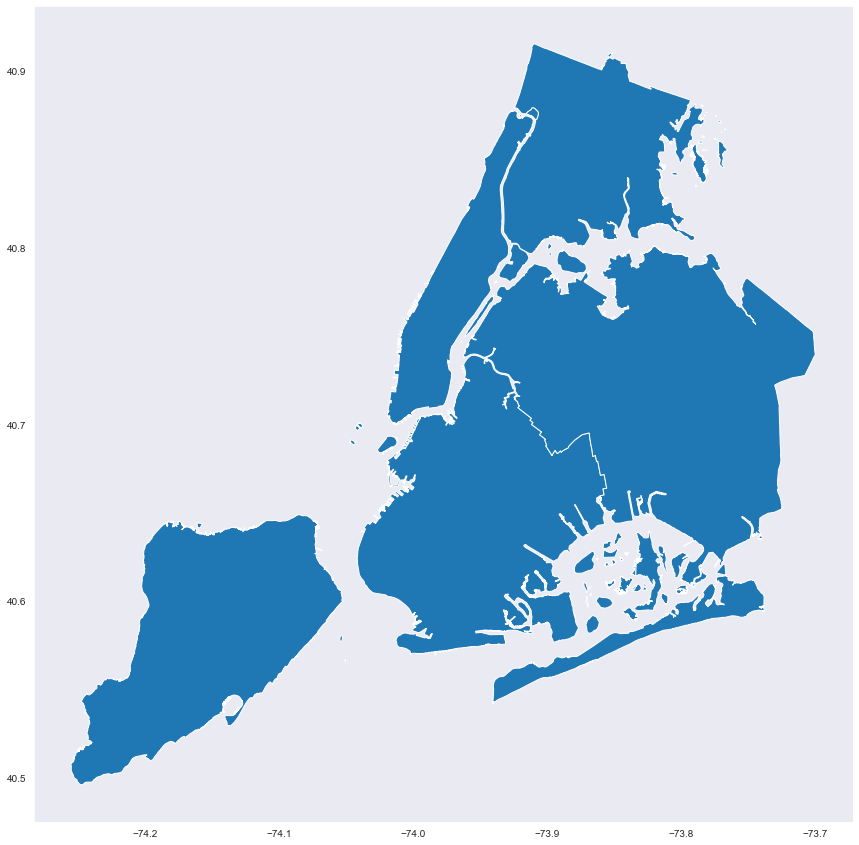

In [18]:
fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [19]:

geometry=[Point(xy)for xy in zip(df.pickup_longitude, df.pickup_latitude)]

In [20]:
geometry_Drop=[Point(xy)for xy in zip(df.dropoff_longitude, df.dropoff_latitude)]

In [22]:
len(geometry)

100000

In [21]:
df.shape

(100000, 32)

In [23]:
crs={'init':'EPSG:4326'}

In [24]:
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [25]:
geo_df_drop=gpd.GeoDataFrame(df,crs=crs,geometry=geometry_Drop)

In [61]:
geo_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,geometry
0,2014-02-19 07:22:00.00000074,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1,POINT (-73.98643 40.76047)
1,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,POINT (-73.97982 40.75190)
2,2014-02-19 16:03:00.000000160,5.5,2014-02-19 16:03:00 UTC,-73.976075,40.752422,-73.981082,40.759285,1,POINT (-73.97607 40.75242)
3,2014-07-16 10:57:00.00000069,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6,POINT (-73.99615 40.74189)
4,2014-05-01 09:12:00.000000198,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6,POINT (-73.96620 40.76750)


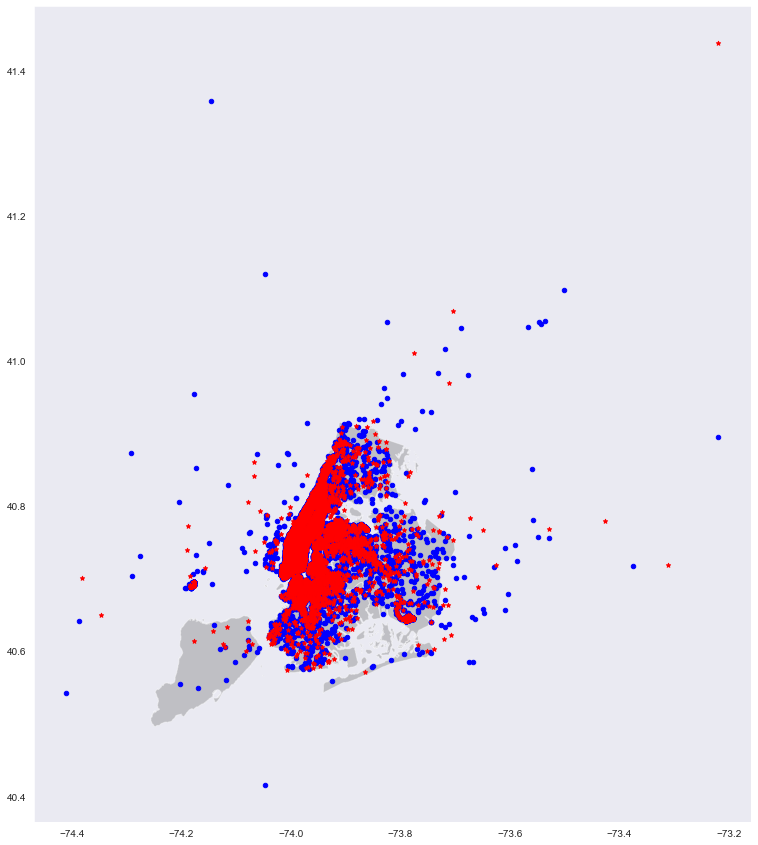

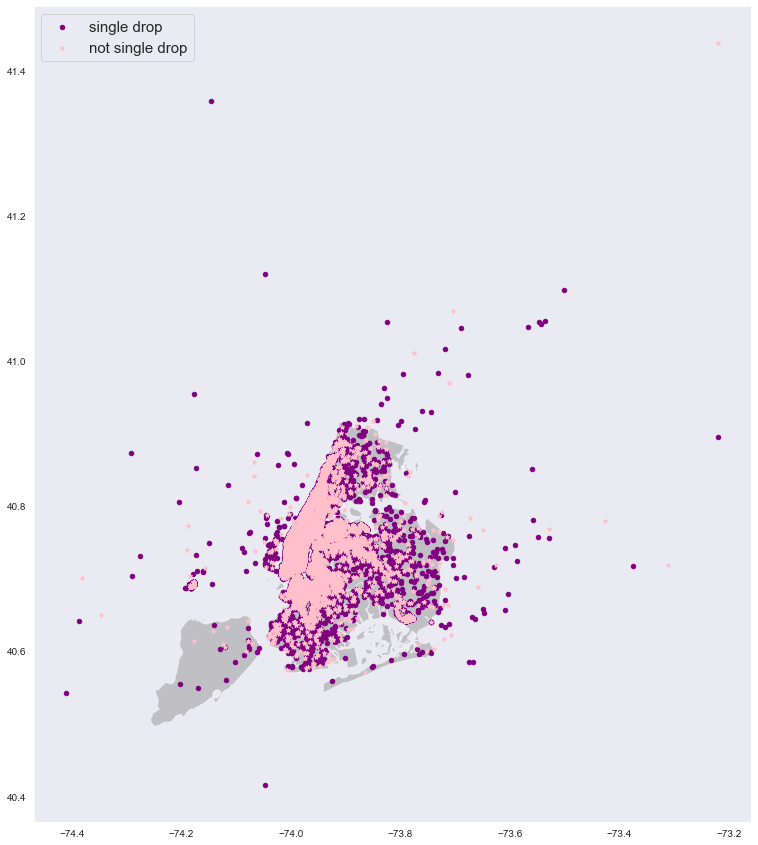

In [26]:

fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['passenger_count']==1].plot(ax=ax,markersize=20,color ='blue',marker='o',label='single_pickup')
geo_df[geo_df['passenger_count']!=1].plot(ax=ax,markersize=20,color ='red',marker='*',label='not single pickup')
plt.show()
fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df_drop[geo_df_drop['passenger_count']==1].plot(ax=ax,markersize=20,color ='purple',marker='o',label='single drop')
geo_df_drop[geo_df_drop['passenger_count']!=1].plot(ax=ax,markersize=20,color ='pink',marker='*',label='not single drop')
plt.legend(prop={'size':15})

In [77]:
street_map2=gpd.read_file('/Users/sandrine/Desktop/Prework/new-york-city-taxi-fare-prediction/2020_05_26_nybb_20b/nybb.shp')

<AxesSubplot:>

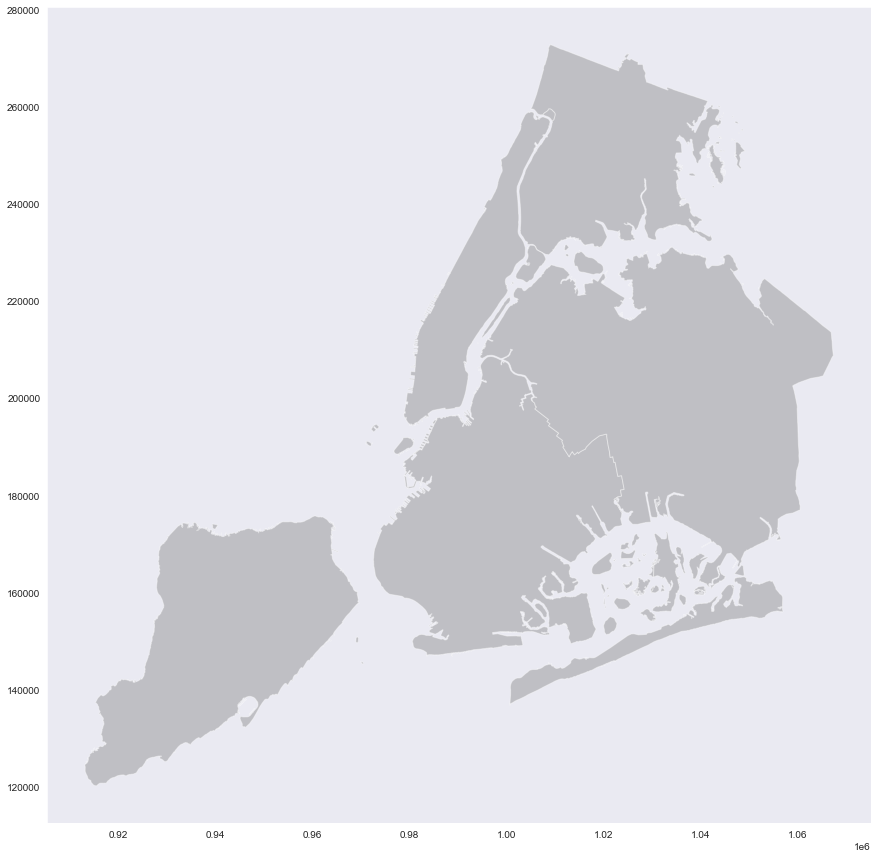

In [79]:
fig,ax=plt.subplots(figsize=(15,15))
street_map2.plot(ax=ax,alpha=0.4,color='grey')

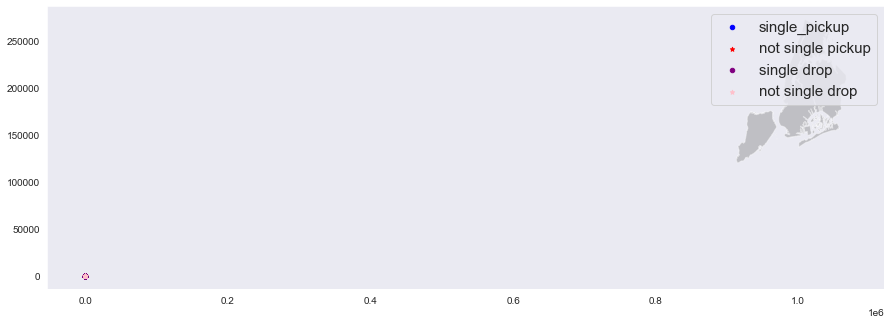

In [78]:
#https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
fig,ax=plt.subplots(figsize=(15,15))
street_map2.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['passenger_count']==1].plot(ax=ax,markersize=20,color ='blue',marker='o',label='single_pickup')
geo_df[geo_df['passenger_count']!=1].plot(ax=ax,markersize=20,color ='red',marker='*',label='not single pickup')
geo_df_drop[geo_df_drop['passenger_count']==1].plot(ax=ax,markersize=20,color ='purple',marker='o',label='single drop')
geo_df_drop[geo_df_drop['passenger_count']!=1].plot(ax=ax,markersize=20,color ='pink',marker='*',label='not single drop')
plt.legend(prop={'size':15})

## viz test

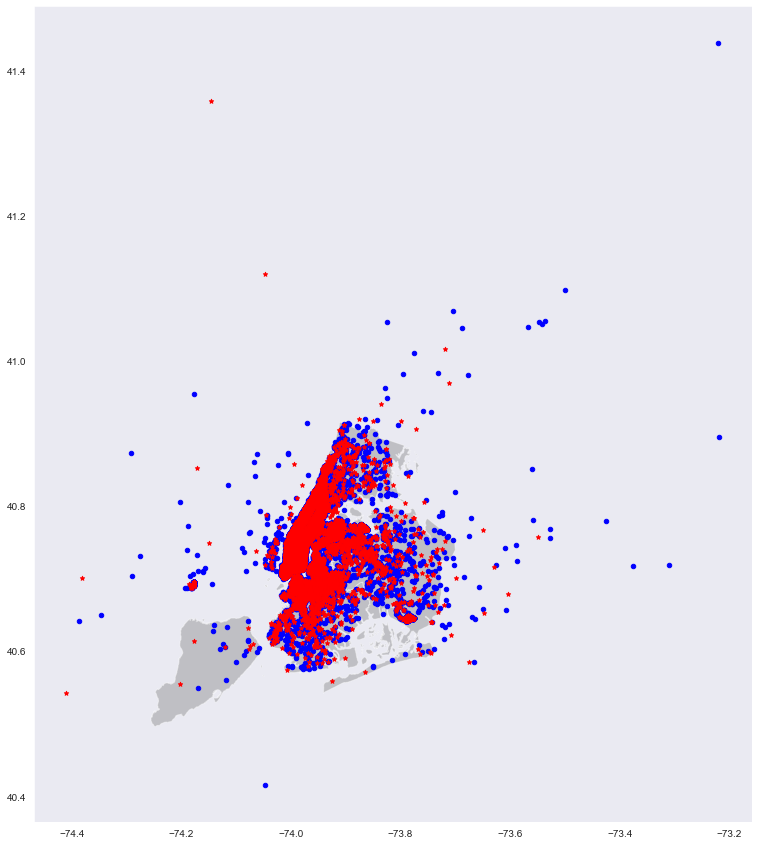

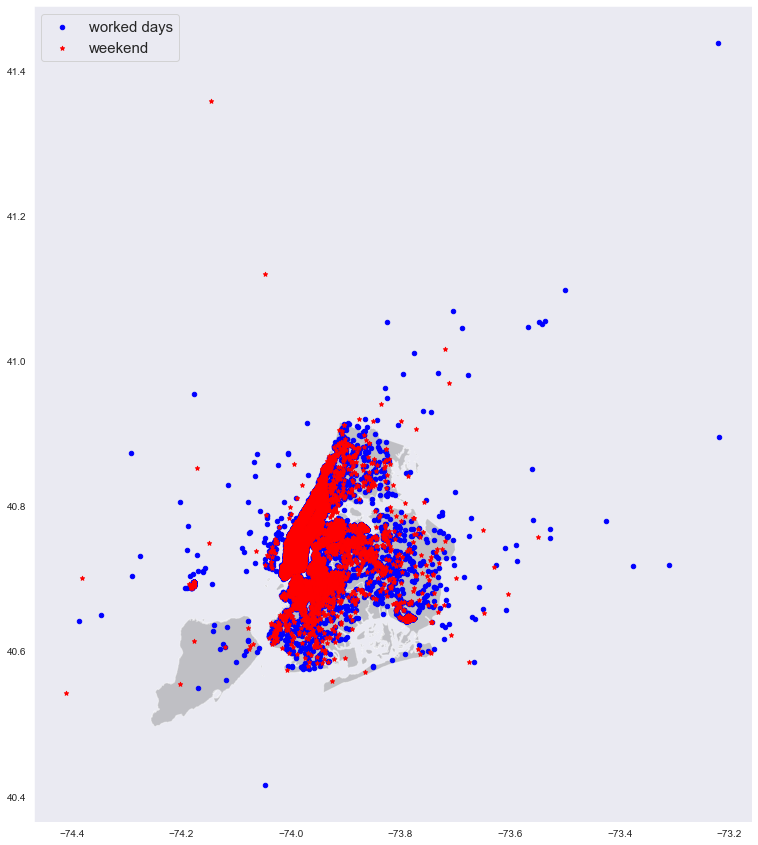

In [31]:

fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['working_days']==1].plot(ax=ax,markersize=20,color ='blue',marker='o',label='worked days')
geo_df[geo_df['working_days']==0].plot(ax=ax,markersize=20,color ='red',marker='*',label='weekend')
plt.show()
fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df_drop[geo_df_drop['working_days']==1].plot(ax=ax,markersize=20,color ='blue',marker='o',label='worked days')
geo_df_drop[geo_df_drop['working_days']==0].plot(ax=ax,markersize=20,color ='red',marker='*',label='weekend')
plt.legend(prop={'size':15})

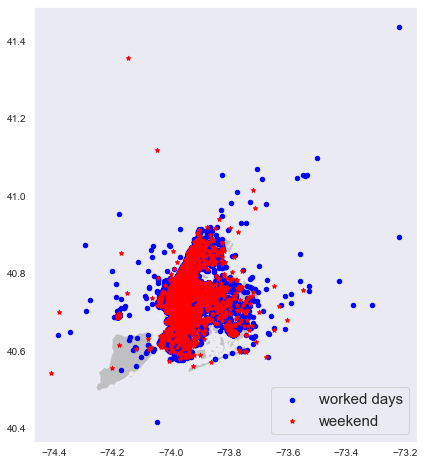

In [39]:
fig,ax=plt.subplots(figsize=(15,8))
street_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['working_days']==1].plot(ax=ax,markersize=20,color ='blue',marker='o',label='worked days')
geo_df[geo_df['working_days']==0].plot(ax=ax,markersize=20,color ='red',marker='*',label='weekend')
plt.legend(prop={'size':15})


<AxesSubplot:>

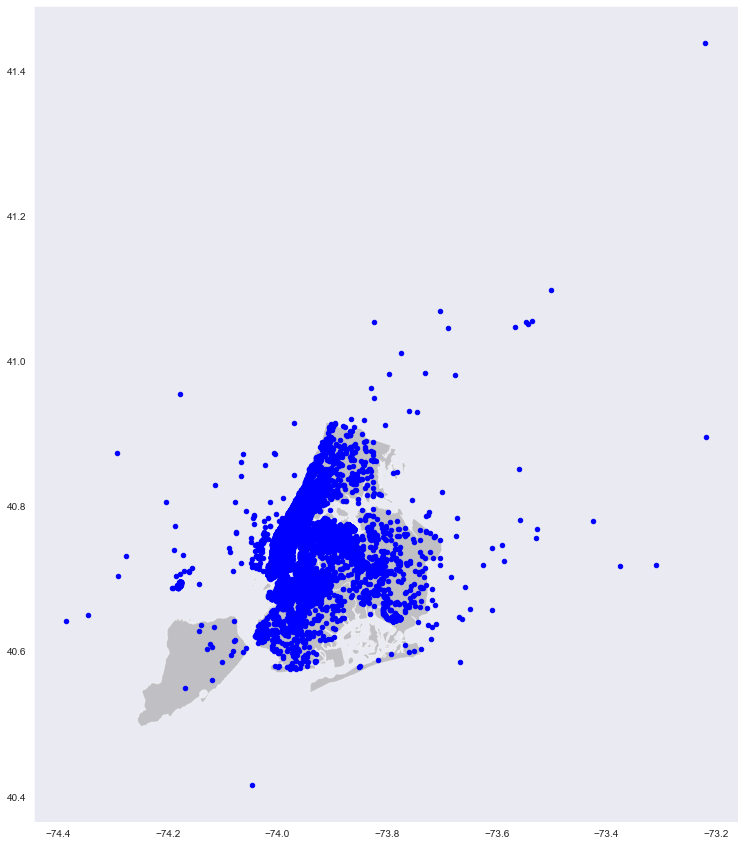

In [37]:
fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['working_days']==1].plot(ax=ax,markersize=20,color ='blue',marker='o',label='worked days')


In [ ]:
‘